In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# prompt: import data from google drive

from google.colab import drive
drive.mount('/content/drive')

# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Financial Planning with AI/fullData.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(file_path)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   ship_date       51290 non-null  object 
 2   ship_mode       51290 non-null  object 
 3   customer_name   51290 non-null  object 
 4   segment         51290 non-null  object 
 5   state           51290 non-null  object 
 6   country         51290 non-null  object 
 7   market          51290 non-null  object 
 8   region          51290 non-null  object 
 9   product_id      51290 non-null  object 
 10  category        51290 non-null  object 
 11  sub_category    51290 non-null  object 
 12  product_name    51290 non-null  object 
 13  sales           51290 non-null  float64
 14  quantity        51290 non-null  int64  
 15  discount        51290 non-null  float64
 16  profit          51290 non-null  float64
 17  shipping_cost   51290 non-null 

In [ ]:
data['year'].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: year, dtype: int64

In [ ]:
data.head()

,order_id,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,day,month,year
0,AG-2011-2040,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,1,1,2011
1,IN-2011-47883,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,1,1,2011
2,HU-2011-1220,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,1,1,2011
3,IT-2011-3647632,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,1,1,2011
4,IN-2011-47883,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,1,1,2011


In [ ]:
data['fsales'] = data['sales'] * data['quantity']
data.head()

,order_id,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,day,month,year,fsales
0,AG-2011-2040,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,1,1,2011,816.0
1,IN-2011-47883,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,1,1,2011,360.0
2,HU-2011-1220,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,1,1,2011,264.0
3,IT-2011-3647632,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,1,1,2011,135.0
4,IN-2011-47883,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,1,1,2011,570.0


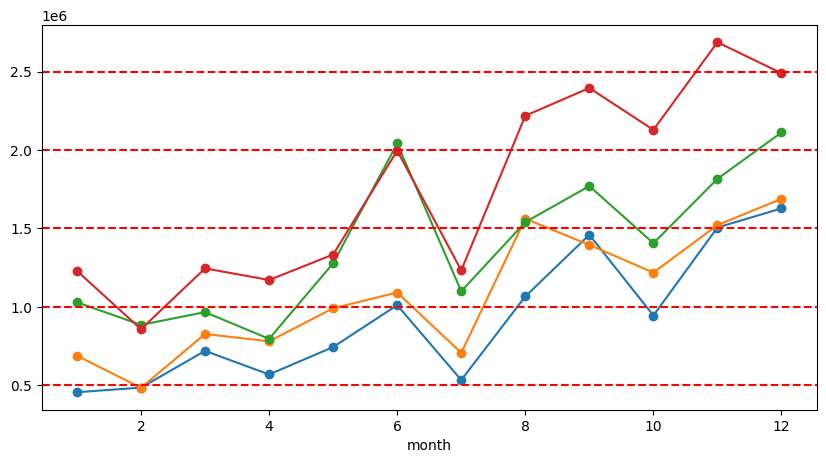

In [ ]:
# prompt: time series plot for sales year=2011

data[data['year'] == 2011].groupby(['month'])['fsales'].sum().plot(kind='line',figsize=(10,5),label='2011',marker='o')
data[data['year'] == 2012].groupby(['month'])['fsales'].sum().plot(kind='line',figsize=(10,5),label='2012',marker='o')
data[data['year'] == 2013].groupby(['month'])['fsales'].sum().plot(kind='line',figsize=(10,5),label='2013',marker='o')
data[data['year'] == 2014].groupby(['month'])['fsales'].sum().plot(kind='line',figsize=(10,5),label='2014',marker='o')

plt.axhline(y=500000, color='r', linestyle='--')
plt.axhline(y=1000000, color='r', linestyle='--')
plt.axhline(y=1500000, color='r', linestyle='--')
plt.axhline(y=2000000, color='r', linestyle='--')
plt.axhline(y=2500000, color='r', linestyle='--')

plt.show()

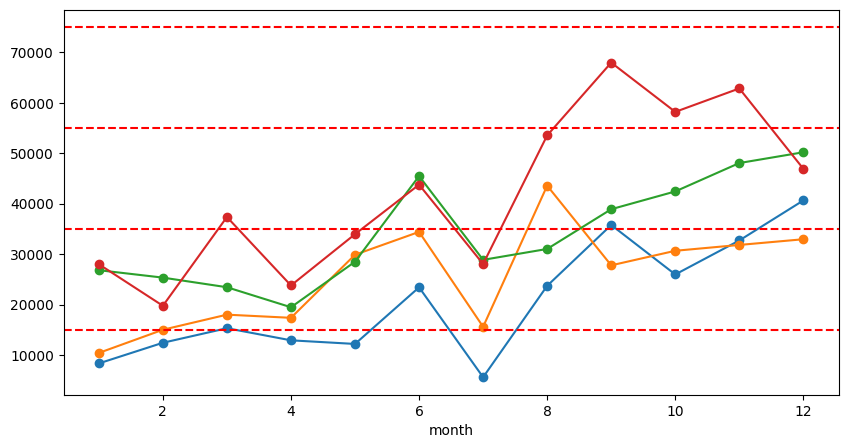

In [ ]:
# prompt: time series plot for sales year=2011

data[data['year'] == 2011].groupby(['month'])['profit'].sum().plot(kind='line',figsize=(10,5),label='2011',marker='o')
data[data['year'] == 2012].groupby(['month'])['profit'].sum().plot(kind='line',figsize=(10,5),label='2012',marker='o')
data[data['year'] == 2013].groupby(['month'])['profit'].sum().plot(kind='line',figsize=(10,5),label='2013',marker='o')
data[data['year'] == 2014].groupby(['month'])['profit'].sum().plot(kind='line',figsize=(10,5),label='2014',marker='o')

plt.axhline(y=15000, color='r', linestyle='--')
plt.axhline(y=35000, color='r', linestyle='--')
plt.axhline(y=55000, color='r', linestyle='--')
plt.axhline(y=75000, color='r', linestyle='--')


In [ ]:
# Assuming your original DataFrame is named 'df'
# Selecting the specific columns you want
selected_columns = ['fsales', 'profit', 'day', 'month', 'year']

# Creating a new DataFrame 'dataSales'
dataSales = data[selected_columns]


In [ ]:
dataSales.head()

,fsales,profit,day,month,year
0,816.0,106.140,1,1,2011
1,360.0,36.036,1,1,2011
2,264.0,29.640,1,1,2011
3,135.0,-26.055,1,1,2011
4,570.0,37.770,1,1,2011


In [ ]:
# Assuming 'dataSales' is your DataFrame
# Grouping the data by 'year' and 'month' and summing up the values
monthly_sales_profit = dataSales.groupby(['year', 'month']).agg({'fsales': 'sum', 'profit': 'sum'}).reset_index()

# Display the resulting DataFrame
print(monthly_sales_profit)


    year  month     fsales       profit
0   2011      1   456781.0   8321.80096
1   2011      2   486096.0  12417.90698
2   2011      3   720094.0  15303.56826
3   2011      4   570043.0  12902.32438
4   2011      5   744546.0  12183.82870
5   2011      6  1011620.0  23415.24702
6   2011      7   534417.0   5585.00352
7   2011      8  1066848.0  23713.66772
8   2011      9  1459947.0  35776.88394
9   2011     10   945421.0  25963.41834
10  2011     11  1506195.0  32709.17772
11  2011     12  1627906.0  40647.98400
12  2012      1   689377.0  10401.63764
13  2012      2   485056.0  15000.09618
14  2012      3   827983.0  17992.91756
15  2012      4   781152.0  17366.96722
16  2012      5   991676.0  29876.70374
17  2012      6  1092046.0  34407.15362
18  2012      7   707877.0  15585.38842
19  2012      8  1562434.0  43573.87858
20  2012      9  1395059.0  27776.18034
21  2012     10  1219297.0  30662.88270
22  2012     11  1521508.0  31820.72180
23  2012     12  1688855.0  32950.75130


In [ ]:
monthly_sales_profit.corr()

,year,month,fsales,profit
year,1.000000e+00,4.864312e-14,0.554731,0.566736
month,4.864312e-14,1.000000e+00,0.692687,0.634316
fsales,5.547312e-01,6.926868e-01,1.000000,0.944562
profit,5.667358e-01,6.343163e-01,0.944562,1.000000


In [ ]:
msp = monthly_sales_profit
msp

,year,month,fsales,profit
0,2011,1,456781.0,8321.80096
1,2011,2,486096.0,12417.90698
2,2011,3,720094.0,15303.56826
3,2011,4,570043.0,12902.32438
4,2011,5,744546.0,12183.82870
5,2011,6,1011620.0,23415.24702
6,2011,7,534417.0,5585.00352
7,2011,8,1066848.0,23713.66772
8,2011,9,1459947.0,35776.88394
9,2011,10,945421.0,25963.41834


## **Profit**

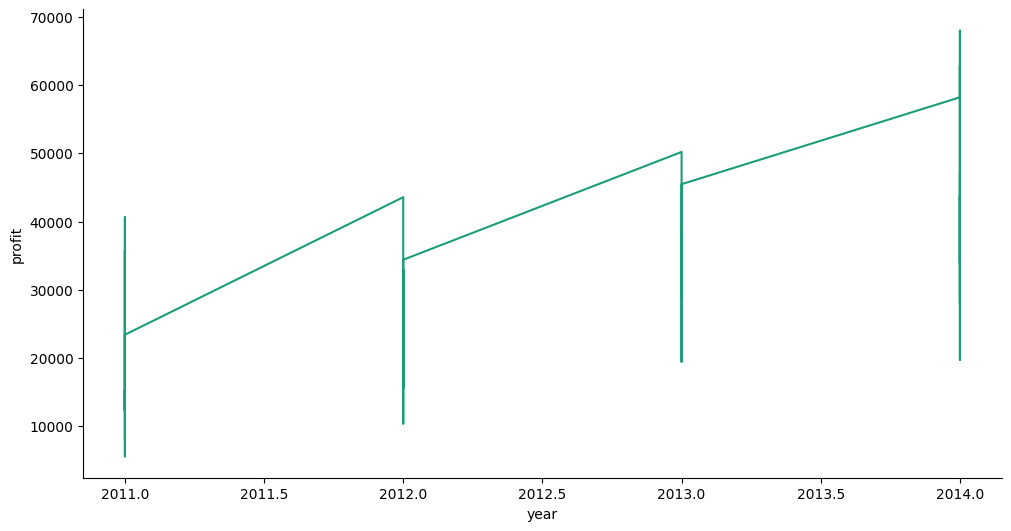

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['profit']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_sales_profit.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('profit')

## **Sales**

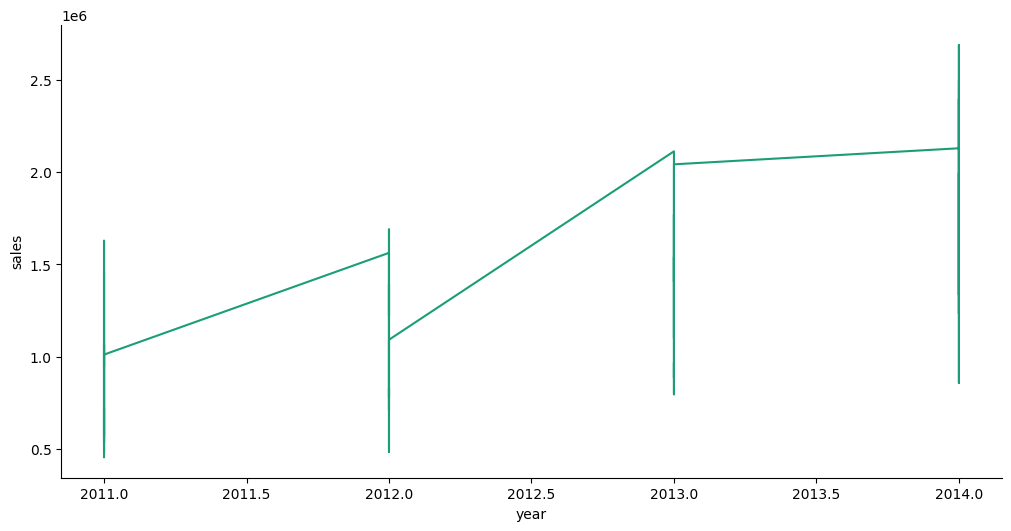

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['fsales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_sales_profit.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('sales')

In [ ]:
# prompt: scatter plot for X and y

msp.corr()


,year,month,fsales,profit
year,1.000000e+00,4.864312e-14,0.554731,0.566736
month,4.864312e-14,1.000000e+00,0.692687,0.634316
fsales,5.547312e-01,6.926868e-01,1.000000,0.944562
profit,5.667358e-01,6.343163e-01,0.944562,1.000000


## SARIMA model for sales forcast

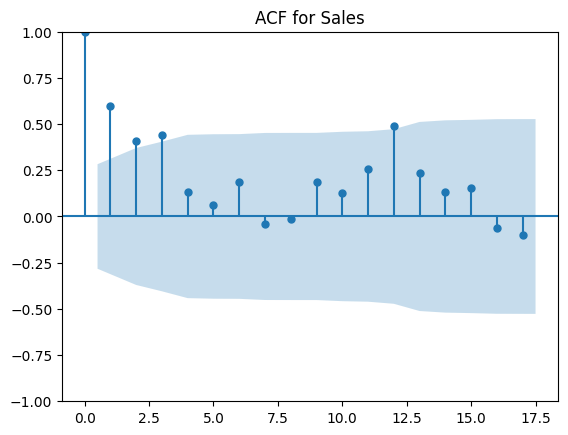

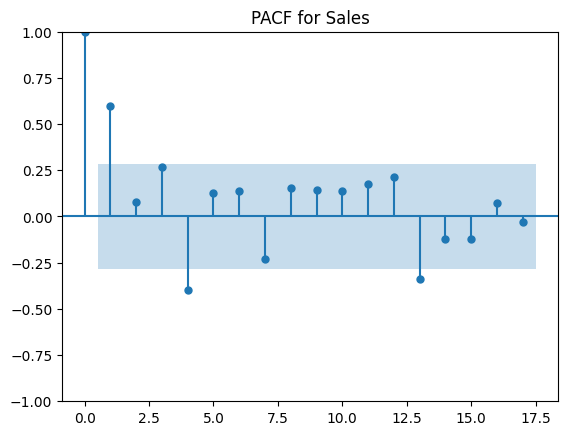

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             fsales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -482.954
Date:                            Fri, 09 Feb 2024   AIC                            975.907
Time:                                    03:52:51   BIC                            983.684
Sample:                                         0   HQIC                           978.592
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6857      0.231      2.966      0.003       0.233       1.139
ma.L1         -0.9375      0.161   

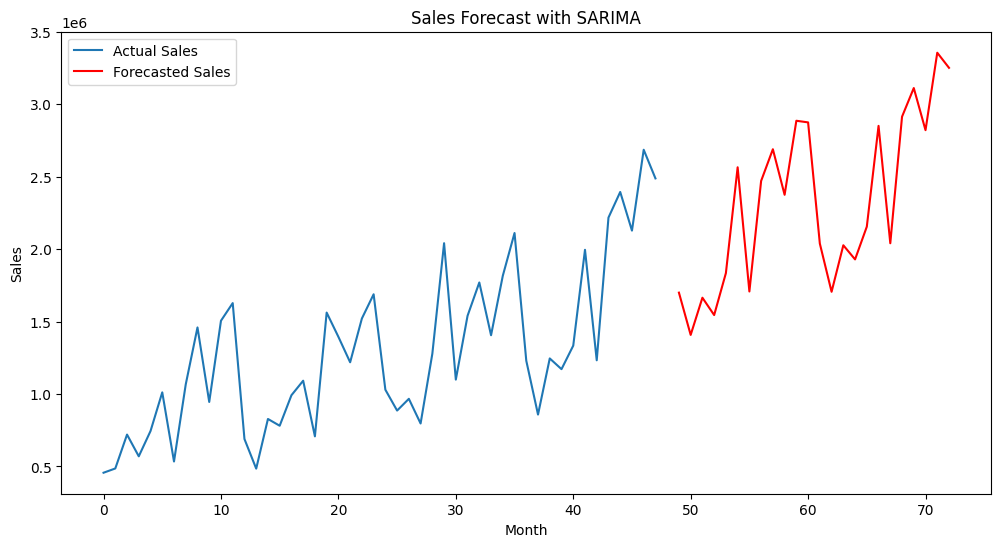

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.DataFrame(msp)

# Plot the sales and profit to visualize the time series data
# plt.figure(figsize=(12, 6))
# plt.plot(df['fsales'], label='Sales')
# plt.plot(df['profit'], label='Profit')
# plt.title('Sales and Profit Over Time')
# plt.xlabel('Month')
# plt.ylabel('Amount')
# plt.legend()
# plt.show()

# Check autocorrelation and partial autocorrelation functions
plot_acf(df['fsales'])
plt.title('ACF for Sales')
plt.show()

plot_pacf(df['fsales'])
plt.title('PACF for Sales')
plt.show()

# Fit a SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model1 = SARIMAX(df['fsales'], order=order, seasonal_order=seasonal_order)
results1 = model1.fit()

# Print the model summary
print(results1.summary())

# Predict sales for the next 12 months
forecast_steps = 24
forecast = results1.get_forecast(steps=forecast_steps)
forecast_index = np.arange(len(df['fsales']) + 1, len(df['fsales']) + 1 + forecast_steps)

# Plot the original sales data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['fsales'], label='Actual Sales')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecasted Sales')
plt.title('Sales Forecast with SARIMA')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
forecast.predicted_mean

48    1.700131e+06
49    1.408301e+06
50    1.665091e+06
51    1.545271e+06
52    1.835141e+06
53    2.565634e+06
54    1.708066e+06
55    2.471351e+06
56    2.690232e+06
57    2.375592e+06
58    2.886875e+06
59    2.875604e+06
60    2.038854e+06
61    1.706010e+06
62    2.027227e+06
63    1.929662e+06
64    2.155652e+06
65    2.851605e+06
66    2.041090e+06
67    2.914851e+06
68    3.112741e+06
69    2.821883e+06
70    3.356598e+06
71    3.252319e+06
Name: predicted_mean, dtype: float64

## SARIMA model for Profit

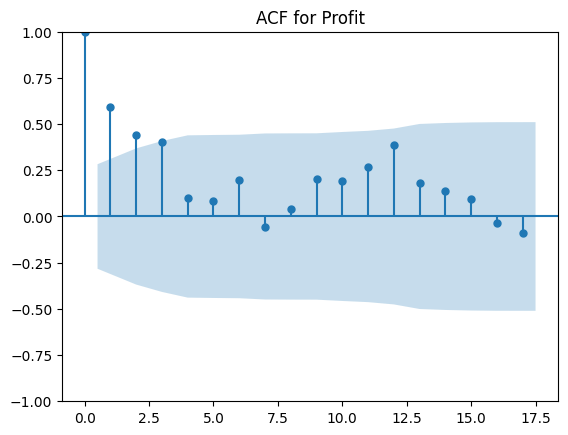

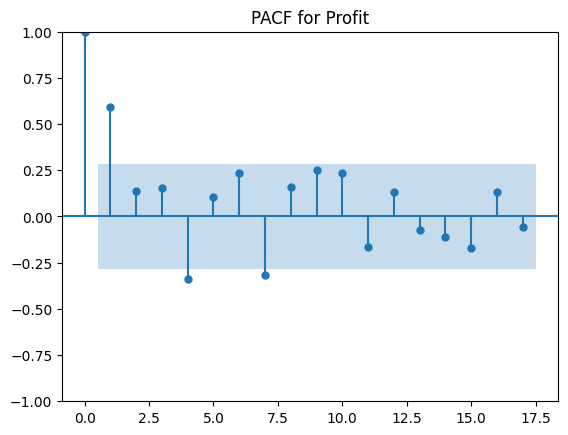

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             profit   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -365.143
Date:                            Fri, 09 Feb 2024   AIC                            740.285
Time:                                    03:53:02   BIC                            748.062
Sample:                                         0   HQIC                           742.970
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4003      0.198      2.018      0.044       0.012       0.789
ma.L1         -0.9201      0.125   

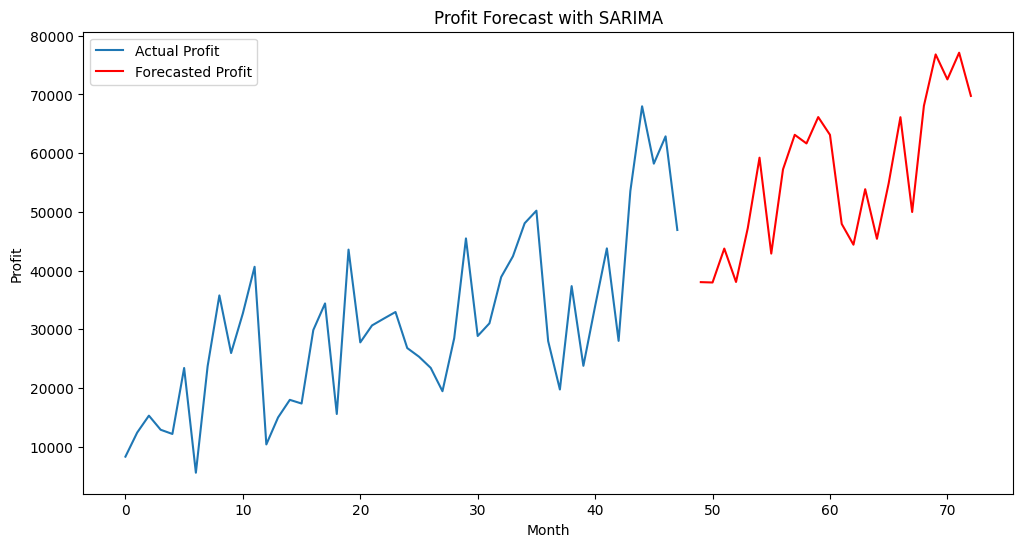

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.DataFrame(msp)

# Plot the sales and profit to visualize the time series data
# plt.figure(figsize=(12, 6))
# plt.plot(df['sales'], label='Sales')
# plt.plot(df['profit'], label='Profit')
# plt.title('Sales and Profit Over Time')
# plt.xlabel('Month')
# plt.ylabel('Amount')
# plt.legend()
# plt.show()

# Check autocorrelation and partial autocorrelation functions
plot_acf(df['profit'])
plt.title('ACF for Profit')
plt.show()

plot_pacf(df['profit'])
plt.title('PACF for Profit')
plt.show()

# Fit a SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model2 = SARIMAX(df['profit'], order=order, seasonal_order=seasonal_order)
results2 = model2.fit()

# Print the model summary
print(results2.summary())

# Predict sales for the next 12 months
forecast_steps = 24
forecast = results2.get_forecast(steps=forecast_steps)
forecast_index = np.arange(len(df['profit']) + 1, len(df['profit']) + 1 + forecast_steps)

# Plot the original sales data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['profit'], label='Actual Profit')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecasted Profit')
plt.title('Profit Forecast with SARIMA')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend()
plt.show()


In [ ]:
forecast.predicted_mean

48    38035.621301
49    37974.457869
50    43749.887276
51    38064.993932
52    47233.105606
53    59225.859046
54    42897.637683
55    57233.117803
56    63117.842134
57    61649.024819
58    66139.767880
59    63114.696835
60    47946.038291
61    44410.591053
62    53859.099270
63    45412.751909
64    54870.297534
65    66117.760999
66    49978.284077
67    68055.175533
68    76805.051673
69    72553.540352
70    77096.381522
71    69742.460620
Name: predicted_mean, dtype: float64

## Model Export to pickle

In [ ]:
import pickle
with open('SalesForecast.pickle','wb') as file:
  pickle.dump(results1,file)
with open('FrofitForecast.pickle','wb') as file:
  pickle.dump(results2,file)

In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/Financial Planning with AI/Notebooks/SalesProfitForecast.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Financial Planning with AI/Notebooks/SalesProfitForecast.ipynb to html
[NbConvertApp] Writing 1205232 bytes to /content/drive/My Drive/Financial Planning with AI/Notebooks/SalesProfitForecast.html


In [ ]:
!sudo apt-get install texlive-xetex
!brew install --cask mactex-no-gui
!jupyter nbconvert --to pdf "/content/drive/My Drive/Financial Planning with AI/Notebooks/SalesProfitForecast.ipynb"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framewor

In [ ]:
!jupyter nbconvert --to markdown "/content/SalesProfitForecast.ipynb"